In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# TenserFlow
import tensorflow as tf
from tensorflow import keras


In [ ]:
data=pd.read_csv('train.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
#sampling
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_test=data[0:2000] #each column is an image
Y_test=data_test[:,0]
X_test=data_test[:,1:n]

data_train=data[2000:m]#each column is an image
Y_train=data_train[:,0]
X_train=data_train[:,1:n]


In [ ]:
Y_test.reshape(2000,1)
Y_test.reshape(40000,1)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [ ]:
from keras.src.engine.training import optimizer
#create a sequentiel because i am having a stack of layers in my neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#optimizer help you reach the optima ( in backward propagation) in a effecient way
#sparse_categorical_crossentrop because we have classification for 0 digits
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics='accuracy')
model.fit(X_train_scaled,Y_train, epochs=5)


Epoch 1/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.8623
Epoch 2/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3175 - accuracy: 0.9115
Epoch 3/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.9193
Epoch 4/5
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9229
Epoch 5/5
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.9252


In [ ]:
# Building with multiple layers
from keras.src.engine.training import optimizer
model = keras.Sequential([
    #keras.layers.Flatten(input_shape(28,28)),
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
    ])

model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics='accuracy')
model.fit(X_train_scaled,Y_train, epochs=5)


Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2793 - accuracy: 0.9151
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1073 - accuracy: 0.9660
Epoch 3/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.0703 - accuracy: 0.9780
Epoch 4/5
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0535 - accuracy: 0.9825
Epoch 5/5
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0429 - accuracy: 0.9866


63/63 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'truth')

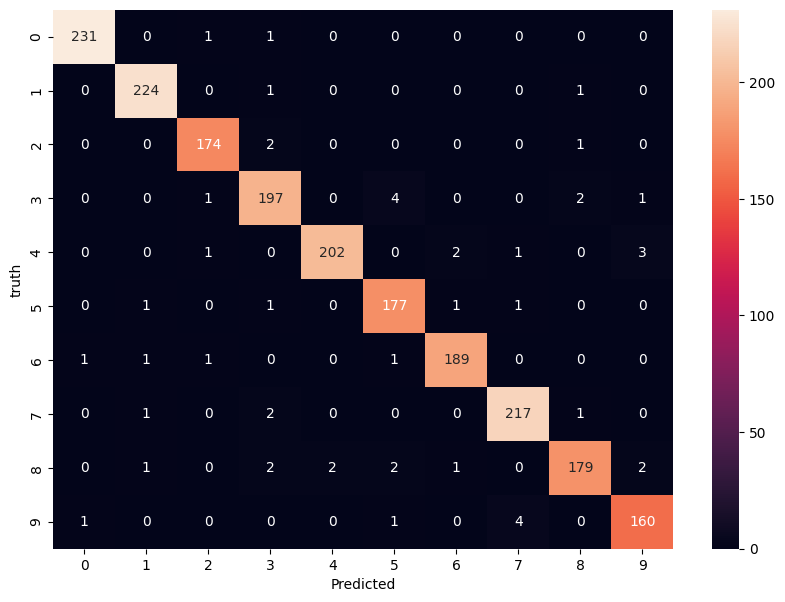

In [ ]:
#remodeling results
Y_predicted=model.predict(X_test_scaled)
Y_predicted_labels=[np.argmax(i) for i in Y_predicted ]
cm= tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [ ]:
test_data=pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data=np.array(test_data)
test_data.shape

(28000, 784)

In [ ]:
test_data_scaled=test_data /255
predicts=model.predict(test_data_scaled)
predicts_labels=[np.argmax(i) for i in predicts ]
predicts_labels


In [ ]:
sub=pd.read_csv('sample_submission.csv')

In [ ]:
nv=pd.DataFrame(sub["ImageId"]) #create new tableau
nv["Label"]=predicts_labels #switch the ids from their submission file to mine
nv.columns=['ImageId','Label'] #building my table
nv.to_csv("submission_DR.csv", index=False) #convert the table to csv